# Adding Matplotlib and Seaborn Plots to Excel

## Writing a Matplotlib plot into Excel

In [1]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

__Study: Adult Male Height in the U.S.__ (normally distributed)

In [2]:
mean_height = 70
std_heigth = 4
sample_size = 1000000

In [4]:
sample = np.random.normal(mean_height, std_heigth, sample_size)

In [5]:
sample

array([65.81412727, 67.6904035 , 70.53954791, ..., 67.77800158,
       69.35273822, 75.12523309])

In [6]:
sample.size

1000000

In [7]:
median_height = np.median(sample)
median_height

69.99652981032739

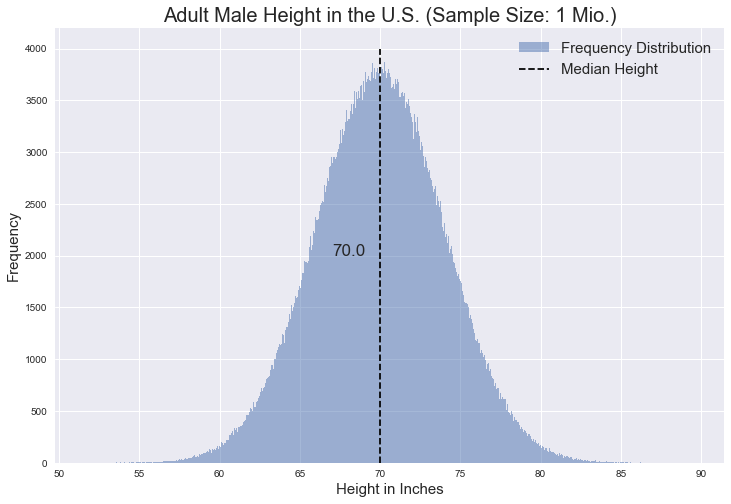

In [36]:
fig = plt.figure(figsize = (12, 8))
plt.hist(sample, bins = 1000, alpha = 0.5, label = "Frequency Distribution")
plt.vlines(x = median_height, ymin = 0, ymax = 4000, linestyle = "--", label = "Median Height")
plt.annotate(round(median_height,1), xy = (median_height-3, 2000), fontsize = 17)
plt.title("Adult Male Height in the U.S. (Sample Size: 1 Mio.)", fontsize = 20)
plt.xlabel("Height in Inches", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

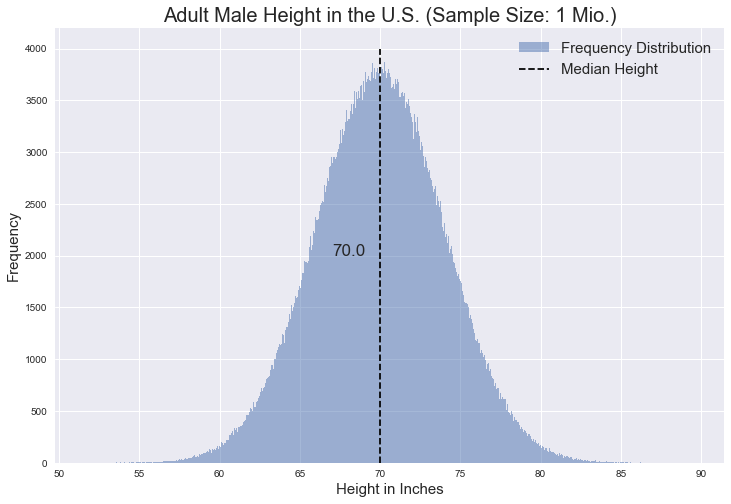

In [37]:
fig

In [41]:
wb = xw.Book()

In [42]:
sheet = wb.sheets[0]

In [25]:
sheet.pictures.add(fig)

<Picture 'Picture 2' in <Sheet [Book3]Sheet1>>

## Updating the Plot

### This adds a New Figure

In [29]:
sheet.pictures.add(fig)

<Picture 'Picture 4' in <Sheet [Book3]Sheet1>>

### This updates the New Figure

In [31]:
sheet.pictures.add(fig, name = "Height", update = True)

<Picture 'Height' in <Sheet [Book3]Sheet1>>

In [35]:
plt.style.use("seaborn")

## Changing Size and Position (Part 1)

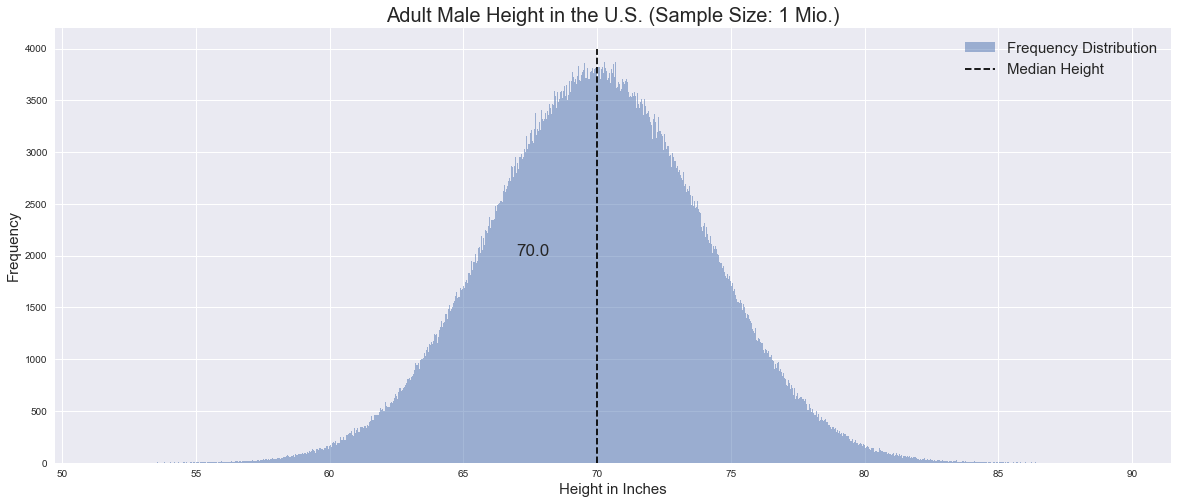

In [59]:
fig = plt.figure(figsize = (20, 8))
plt.hist(sample, bins = 1000, alpha = 0.5, label = "Frequency Distribution")
plt.vlines(x = median_height, ymin = 0, ymax = 4000, linestyle = "--", label = "Median Height")
plt.annotate(round(median_height,1), xy = (median_height-3, 2000), fontsize = 17)
#plt.title("Adult Male Height in the U.S. (Sample Size: 1 Mio.)", fontsize = 20)
plt.xlabel("Height in Inches", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [43]:
sheet.pictures.add(fig, name = "Height", update = True)

<Picture 'Height' in <Sheet [Book1]Sheet1>>

In [56]:
plot = sheet.pictures.add(fig, name = "Height", update = True)

In [45]:
type(plot)

xlwings.main.Picture

In [46]:
plot.left

0.0

In [47]:
plot.top

0.0

In [48]:
plot.left = 100
plot.top = 50

In [49]:
plot.left = sheet.range("B2").left
plot.top = sheet.range("B2").top

In [50]:
plot.height

483.1100769042969

In [51]:
plot.width

731.1666259765625

In [57]:
plot.height /= 2
plot.width /= 2

In [53]:
plot.height

241.55503845214844

In [54]:
plot.width *= 3

## Changing Size and Position (Part 2)

In [61]:
sheet.pictures.add(fig, name = "Height", update = True, 
                   left = sheet.range("B2").left, 
                   top = sheet.range("B2").top,
                   scale = 0.6)

<Picture 'Height' in <Sheet [Book1]Sheet1>>

## Adding a Seaborn Plot

In [62]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
mean_height = 70
std_heigth = 4
sample_size = 1000

In [64]:
sample = np.random.normal(mean_height, std_heigth, sample_size)

In [65]:
sample

array([63.32866153, 70.40216325, 76.21934302, 66.48078518, 71.49635417,
       65.65381411, 61.76268075, 71.14177849, 65.76785671, 80.37282005,
       71.74306091, 68.35732573, 71.6816512 , 66.71861148, 68.44234567,
       68.5211889 , 75.73100796, 68.56618679, 67.36749472, 67.34173813,
       67.79573756, 62.22012292, 67.95072561, 84.45130939, 71.67688773,
       72.03460455, 70.20377932, 73.07733136, 72.41763297, 69.58238971,
       72.75512706, 67.56194272, 77.25383993, 67.7520439 , 67.5626325 ,
       62.77260347, 70.67755476, 67.03765028, 67.42129599, 73.89639269,
       68.33187525, 68.10833021, 71.65531279, 70.87721221, 65.23097324,
       75.65817435, 67.89441365, 65.66430998, 73.39757554, 71.52780998,
       64.57737275, 70.65217317, 74.91067615, 65.72423391, 69.2604076 ,
       69.89630009, 74.82899091, 73.6141462 , 76.15597055, 74.3828967 ,
       68.94532333, 68.92260839, 69.23284411, 71.12255516, 68.02823975,
       75.13002168, 71.22346284, 68.45345554, 66.43156275, 69.75

In [66]:
median_height = np.median(sample)
median_height

69.98499930988217

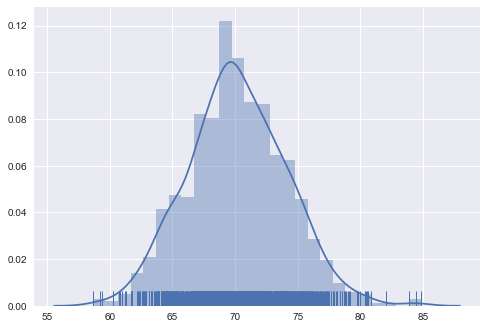

In [70]:
sns.distplot(sample, hist = True, kde= True, rug = True)
plt.show()

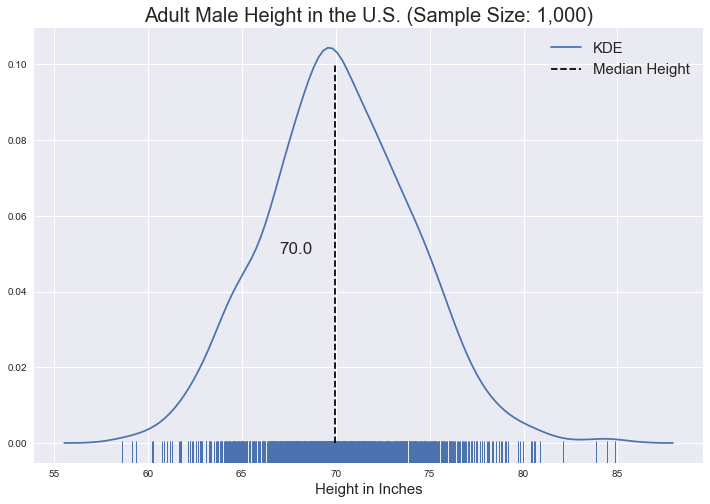

In [71]:
fig = plt.figure(figsize = (12, 8))
sns.distplot(sample, hist = False, kde= True, rug = True, label = "KDE")
plt.vlines(x = median_height, ymin = 0, ymax = 0.1, linestyle = "--", label = "Median Height")
plt.annotate(round(median_height,1), xy = (median_height-3, 0.05), fontsize = 17)
plt.title("Adult Male Height in the U.S. (Sample Size: 1,000)", fontsize = 20)
plt.xlabel("Height in Inches", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [72]:
wb = xw.Book()

In [73]:
sheet = wb.sheets[0]

In [74]:
plot = sheet.pictures.add(fig, name = "Height", update = True)

In [75]:
plot.left = sheet.range("B2").left
plot.top = sheet.range("B2").top

In [76]:
plot.height /= 2
plot.width /= 2

In [77]:
sheet.pictures.add(fig, name = "Height", update = True,
                   left = sheet.range("B2").left, 
                   top = sheet.range("B2").top,
                   scale = 0.5)

<Picture 'Height' in <Sheet [Book1]Sheet1>>

## Creating Excel Charts with Python

In [78]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

In [79]:
wb = xw.Book()

In [80]:
sheet = wb.sheets[0]

In [81]:
sheet.range("A1").options(transpose = True).value = [1, 3, 4, 6, 8, 10]

In [82]:
sheet.range("A1").expand().value

[1.0, 3.0, 4.0, 6.0, 8.0, 10.0]

In [83]:
chart = sheet.charts.add()

In [84]:
chart

<Chart 'Chart 1' in <Sheet [Book1]Sheet1>>

In [85]:
chart.set_source_data(sheet.range("A1").expand())

In [90]:
chart.chart_type = "area"

In [87]:
xw.constants.chart_types

('3d_area',
 '3d_area_stacked',
 '3d_area_stacked_100',
 '3d_bar_clustered',
 '3d_bar_stacked',
 '3d_bar_stacked_100',
 '3d_column',
 '3d_column_clustered',
 '3d_column_stacked',
 '3d_column_stacked_100',
 '3d_line',
 '3d_pie',
 '3d_pie_exploded',
 'area',
 'area_stacked',
 'area_stacked_100',
 'bar_clustered',
 'bar_of_pie',
 'bar_stacked',
 'bar_stacked_100',
 'bubble',
 'bubble_3d_effect',
 'column_clustered',
 'column_stacked',
 'column_stacked_100',
 'combination',
 'cone_bar_clustered',
 'cone_bar_stacked',
 'cone_bar_stacked_100',
 'cone_col',
 'cone_col_clustered',
 'cone_col_stacked',
 'cone_col_stacked_100',
 'cylinder_bar_clustered',
 'cylinder_bar_stacked',
 'cylinder_bar_stacked_100',
 'cylinder_col',
 'cylinder_col_clustered',
 'cylinder_col_stacked',
 'cylinder_col_stacked_100',
 'doughnut',
 'doughnut_exploded',
 'line',
 'line_markers',
 'line_markers_stacked',
 'line_markers_stacked_100',
 'line_stacked',
 'line_stacked_100',
 'pie',
 'pie_exploded',
 'pie_of_pie',
 '

In [91]:
chart.left = sheet.range("D4").left
chart.top = sheet.range("D4").top

In [92]:
chart.height

211.0

In [93]:
chart.width

355.0

In [94]:
chart.height = 150
chart.width = 400